# A proposal to analyze the blood microbiome of diabetics

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

Importing the output of MED for the plasma samples

In [10]:
PlasmaMED = pd.read_csv('PlasmaMED.csv')

In [11]:
PlasmaMED.head()

,samples,P1,P11,P12,P14,P15,P16,P18,P2,P22,...,P26,P27,P29,P3,P30,P4,P5,P6,P9,Unnamed: 20
0,5624,2.681408,6.723849,6.550343,7.688760,5.437234,0.075802,5.595460,6.307278,5.943878,...,0.030303,15.307095,3.120673,0.874905,5.474765,4.066634,0.116891,5.805307,1.877624,NaN
1,4721,0.025416,0.019718,0.543478,4.111214,2.455525,8.268222,2.420629,0.723912,2.729592,...,3.080808,0.000000,1.618916,2.893918,0.009505,0.024498,6.165985,1.115430,2.201560,NaN
2,5020,0.038124,0.029577,0.000000,0.006588,0.008352,1.224490,7.082316,0.585291,0.000000,...,0.000000,0.000000,0.000000,7.234794,0.000000,4.507594,0.204559,0.000000,3.293341,NaN
3,3669,0.012708,2.740806,3.747140,0.019765,0.000000,0.005831,0.007183,4.536003,1.454082,...,1.909091,0.027237,3.344339,0.008413,5.161106,8.035277,0.029223,2.450566,1.535693,NaN
4,37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.815687,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


As seen above, the output of MED provides a list of oligotypes, each representing a taxonomic node as well as the read abundances for each of the samples. 

The next step is to identify the species that the oligotypes represent. In order to do this, I carried out a BLAST analysis against the Human oral microbiome database. The results of which are shown below:

In [12]:
PlasmaHomd = pd.read_csv('16SrRNA_HOMD_Plasma.csv')

In [13]:
PlasmaHomd.head()

,Query seq,Query length (nt),Hit HOT,Hit HOMD seq name,HOMD clone name,Identities (%),Mismatch,Identities (no gaps & non-AGCTU)(%),Mismatch (no gaps & non-AGCTU),Score (bits),Query Start,Subject Start,Query End,Subject End
0,15,300,23,023_0186,Delftia acidovorans | HOT_023 | Strain_MBIC 13...,95.6,13/298,95.6,13/298,479.0,1,305,298,602
1,23,300,22,022_3223,Lautropia mirabilis | HOT_022 | Strain_Frederi...,81.3,56/299,83.2,49/292,275.0,1,307,295,602
2,37,300,547,547_6490,Porphyromonas asaccharolytica | HOT_547 | Stra...,100.0,0/31,100.0,0/31,57.2,230,747,260,777
3,39,239,827,827_7604,Yersinia pestis | HOT_827 | Strain_not listed ...,82.5,42/240,84.3,37/235,226.0,1,313,237,550
4,64,242,938,938_0337,Lactobacillus reuteri genosp. 2 | HOT_938 | St...,100.0,0/27,100.0,0/27,50.0,176,787,202,813


The first column in the above table (Query seq), corresponds to the ID's in the 'samples' column of the output of MED. 

The next step is to import the buffy coat output from MED.

In [14]:
BCMED = pd.read_csv('BuffycoatMED.csv')

In [15]:
BCMED.head()

,samples,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,BC18,...,BC27,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9
0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,57,0.237921,0.205846,0.302812,0.045263,0.325054,0.078864,0.355735,0.250238,0.565428,...,0.411080,0.150477,0.385256,0.35963,0.158781,0.322407,0.126537,0.070061,0.413330,0.187348
2,353,0.000000,1.289968,1.499640,0.000000,1.966994,0.000000,0.000000,0.460437,0.000000,...,0.000000,0.827621,0.004756,0.00000,0.000000,0.934981,3.543022,0.000000,0.000000,0.000000
3,362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.615509,...,0.000000,0.994817,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,653,1.610542,6.010704,0.360490,0.000000,0.183364,2.661672,3.278531,0.000000,0.000000,...,2.985005,0.000000,0.000000,0.00000,0.007939,0.005373,0.018077,0.216021,1.633945,0.000000


Next, I imported the results of the buffy coat alignment data from HomD

In [16]:
ls

16SrRNA_HOMD_Plasma.csv
BChomd.csv
Blood microbiome Plasma vs buffy coat.ipynb
BuffycoatMED.csv
PlasmaMED.csv
README.md


In [17]:
Bchomd = pd.read_csv('BChomd.csv')

In [18]:
Bchomd.head()

,Query seq,Query length (nt),Hit HOT,Hit HOMD seq name,HOMD clone name,Identities (%),Mismatch,Identities (no gaps & non-AGCTU)(%),Mismatch (no gaps & non-AGCTU),Score (bits),Query Start,Subject Start,Query End,Subject End
0,20,300,824,824_5951,Bacillus anthracis | HOT_824 | Strain_Delta Am...,100.0,0/300,100.0,0/300,542,1,321,300,620
1,57,198,3,003_0566,Sphingomonas echinoides | HOT_003 | Clone_nby4...,100.0,0/198,100.0,0/198,358,1,281,198,478
2,353,300,25,025AV011,Leptothrix sp. | HOT_025 | Clone_AV011a | GB_A...,94.7,16/301,95.3,14/299,464,1,307,300,606
3,362,300,571,571_7530,Burkholderia cepacia | HOT_571 | Strain_ATCC 2...,99.3,2/300,99.3,2/300,533,1,309,300,608
4,653,300,612,612_4476,Pseudomonas fluorescens | HOT_612 | Strain_ATC...,100.0,0/300,100.0,0/300,542,1,307,300,606


## Plasma samples
I need to replace the sample ID's with the species names. 

First I want to sort all the data by sample Id in order to look at the data

In [19]:
cleanplasma_med = PlasmaMED.groupby(['samples'], as_index=False).sum()

In [20]:
cleanplasma_med.head()

,samples,P1,P11,P12,P14,P15,P16,P18,P2,P22,...,P26,P27,P29,P3,P30,P4,P5,P6,P9,Unnamed: 20
0,15,0.012708,0.0,0.000000,0.0,0.0,0.0,1.077431,0.0,0.0,...,0.0,0.0,0.0,0.008413,0.0,0.0,0.000000,0.0,2.531494,NaN
1,23,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,7.071888,0.0,0.000000,NaN
2,37,0.000000,0.0,0.000000,0.0,0.0,0.0,2.815687,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,NaN
3,39,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,8.270018,0.0,0.000000,NaN
4,64,0.000000,0.0,9.782609,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,NaN


Now, I'm going to merge the two plasma tables

In [21]:
merged_plasma= pd.merge(left = cleanplasma_med, right= PlasmaHomd, left_on= 'samples', right_on='Query seq')

In [22]:
merged_plasma.head()

,samples,P1,P11,P12,P14,P15,P16,P18,P2,P22,...,HOMD clone name,Identities (%),Mismatch,Identities (no gaps & non-AGCTU)(%),Mismatch (no gaps & non-AGCTU),Score (bits),Query Start,Subject Start,Query End,Subject End
0,15,0.012708,0.0,0.000000,0.0,0.0,0.0,1.077431,0.0,0.0,...,Delftia acidovorans | HOT_023 | Strain_MBIC 13...,95.6,13/298,95.6,13/298,479.0,1,305,298,602
1,23,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,Lautropia mirabilis | HOT_022 | Strain_Frederi...,81.3,56/299,83.2,49/292,275.0,1,307,295,602
2,37,0.000000,0.0,0.000000,0.0,0.0,0.0,2.815687,0.0,0.0,...,Porphyromonas asaccharolytica | HOT_547 | Stra...,100.0,0/31,100.0,0/31,57.2,230,747,260,777
3,39,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,Yersinia pestis | HOT_827 | Strain_not listed ...,82.5,42/240,84.3,37/235,226.0,1,313,237,550
4,64,0.000000,0.0,9.782609,0.0,0.0,0.0,0.000000,0.0,0.0,...,Lactobacillus reuteri genosp. 2 | HOT_938 | St...,100.0,0/27,100.0,0/27,50.0,176,787,202,813


In [23]:
merged_plasma.columns

Index(['samples', 'P1', 'P11', 'P12', 'P14', 'P15', 'P16', 'P18', 'P2', 'P22',
       'P24', 'P26', 'P27', 'P29', 'P3', 'P30', 'P4', 'P5', 'P6', 'P9',
       'Unnamed: 20', 'Query seq', 'Query length (nt)', 'Hit HOT',
       'Hit HOMD seq name', 'HOMD clone name', 'Identities (%)', 'Mismatch',
       'Identities (no gaps & non-AGCTU)(%)', 'Mismatch (no gaps & non-AGCTU)',
       'Score (bits)', 'Query Start', 'Subject Start', 'Query End',
       'Subject End'],
      dtype='object')

When I looked that the BLAST output, from alignment with the HomD database, it was clear that the same species could be represented in more that one node. I need to sum all duplicates and their read abundances. 

In [24]:
rearrange_plasma= merged_plasma.groupby(['HOMD clone name'], as_index=False).sum()

In [25]:
rearrange_plasma.head()

,HOMD clone name,samples,P1,P11,P12,P14,P15,P16,P18,P2,...,Query seq,Query length (nt),Hit HOT,Identities (%),Identities (no gaps & non-AGCTU)(%),Score (bits),Query Start,Subject Start,Query End,Subject End
0,Acinetobacter sp. | HOT_408 | Clone_C4AKM094 |...,1118,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.007183,0.000000,...,1118,300,408,97.7,97.7,509.0,1,307,300,606
1,Bergeyella sp. | HOT_319 | Clone_AY017 | GB_AF...,1494,0.000000,0.000000,0.0,0.000000,2.288482,0.000000,0.000000,0.000000,...,1494,300,319,94.7,94.7,470.0,1,307,300,606
2,Cardiobacterium hominis | HOT_633 | Strain_ATC...,80,0.000000,0.000000,0.0,0.000000,3.390963,0.000000,0.000000,0.000000,...,80,300,633,87.9,88.2,372.0,1,309,298,605
3,Cupriavidus gilardii | HOT_027 | Strain_C37KA ...,14970,0.000000,0.009859,0.0,0.006588,0.008352,0.221574,1.659244,0.107817,...,14970,795,81,274.5,274.5,1101.0,3,915,774,1686
4,Delftia acidovorans | HOT_023 | Strain_MBIC 13...,15,0.012708,0.000000,0.0,0.000000,0.000000,0.000000,1.077431,0.000000,...,15,300,23,95.6,95.6,479.0,1,305,298,602


In [26]:
Plasma_reads= rearrange_plasma.groupby(['HOMD clone name'], as_index=False).sum()

In [148]:
Plasma_reads=Plasma_reads[['HOMD clone name', 'P1', 'P11', 'P12', 'P14', 'P15', 'P16', 'P18', 'P2', 'P22',
       'P24', 'P26', 'P27', 'P29', 'P3', 'P30', 'P4', 'P5', 'P6', 'P9']]

In [153]:
Plasma_reads.head()

,HOMD clone name,P1,P11,P12,P14,P15,P16,P18,P2,P22,P24,P26,P27,P29,P3,P30,P4,P5,P6,P9
0,Acinetobacter sp. | HOT_408 | Clone_C4AKM094 |...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.007183,0.000000,0.0,0.000000,2.848485,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Bergeyella sp. | HOT_319 | Clone_AY017 | GB_AF...,0.000000,0.000000,0.0,0.000000,2.288482,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,Cardiobacterium hominis | HOT_633 | Strain_ATC...,0.000000,0.000000,0.0,0.000000,3.390963,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.912461,0.000000,0.000000,0.0,0.000000
3,Cupriavidus gilardii | HOT_027 | Strain_C37KA ...,0.000000,0.009859,0.0,0.006588,0.008352,0.221574,1.659244,0.107817,0.0,1.641973,0.000000,0.0,0.0,1.976950,0.000000,1.069737,0.058445,0.0,0.767846
4,Delftia acidovorans | HOT_023 | Strain_MBIC 13...,0.012708,0.000000,0.0,0.000000,0.000000,0.000000,1.077431,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.008413,0.000000,0.000000,0.000000,0.0,2.531494


The names for the species contains a lot of extra information that I do not need. I need to extract only the species name.

In [151]:
p_names = []
label = ['species']
for i in Plasma_reads['HOMD clone name']:
    new = [i.split("|")[0]]
    new_tuple = tuple(new)
    p_names.append((tuple(new)))

new_pnames = Plasma_reads.from_records(p_names,columns=label)
new_pnames

,species
0,Acinetobacter sp.
1,Bergeyella sp.
2,Cardiobacterium hominis
3,Cupriavidus gilardii
4,Delftia acidovorans
5,Enterobacter hormaechei
6,Gemella sp.
7,Kingella sp.
8,Kocuria sp.
9,Kytococcus sedentarius


I need to add these names to the new table

In [154]:
update_name_plasmareads= pd.concat([Plasma_reads, new_pnames], axis=1)

In [156]:
update_name_plasmareads.head()

,HOMD clone name,P1,P11,P12,P14,P15,P16,P18,P2,P22,...,P26,P27,P29,P3,P30,P4,P5,P6,P9,species
0,Acinetobacter sp. | HOT_408 | Clone_C4AKM094 |...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.007183,0.000000,0.0,...,2.848485,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Acinetobacter sp.
1,Bergeyella sp. | HOT_319 | Clone_AY017 | GB_AF...,0.000000,0.000000,0.0,0.000000,2.288482,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Bergeyella sp.
2,Cardiobacterium hominis | HOT_633 | Strain_ATC...,0.000000,0.000000,0.0,0.000000,3.390963,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.912461,0.000000,0.000000,0.0,0.000000,Cardiobacterium hominis
3,Cupriavidus gilardii | HOT_027 | Strain_C37KA ...,0.000000,0.009859,0.0,0.006588,0.008352,0.221574,1.659244,0.107817,0.0,...,0.000000,0.0,0.0,1.976950,0.000000,1.069737,0.058445,0.0,0.767846,Cupriavidus gilardii
4,Delftia acidovorans | HOT_023 | Strain_MBIC 13...,0.012708,0.000000,0.0,0.000000,0.000000,0.000000,1.077431,0.000000,0.0,...,0.000000,0.0,0.0,0.008413,0.000000,0.000000,0.000000,0.0,2.531494,Delftia acidovorans


Need to essentially replace the HOMD clone name with species name. If there were identical species but different strains, this would have been listed seperately in the the table above. I also need to sum the values for any identical species.

In [161]:
re_plasma = update_name_plasmareads[['species', 'P1', 'P11', 'P12', 'P14', 'P15', 'P16', 'P18', 'P2', 'P22',
       'P24', 'P26', 'P27', 'P29', 'P3', 'P30', 'P4', 'P5', 'P6', 'P9']]

In [163]:
completed_plasma = re_plasma.groupby(['species'], as_index=False).sum()

The table below is the completed table with a list of the species present in the plasma, with their read abundance

In [164]:
completed_plasma

,species,P1,P11,P12,P14,P15,P16,P18,P2,P22,P24,P26,P27,P29,P3,P30,P4,P5,P6,P9
0,Acinetobacter sp.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007183,0.000000,0.000000,0.000000,2.848485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bergeyella sp.,0.000000,0.000000,0.000000,0.000000,2.288482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cardiobacterium hominis,0.000000,0.000000,0.000000,0.000000,3.390963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.912461,0.000000,0.000000,0.000000,0.000000
3,Cupriavidus gilardii,0.000000,0.009859,0.000000,0.006588,0.008352,0.221574,1.659244,0.107817,0.000000,1.641973,0.000000,0.000000,0.000000,1.976950,0.000000,1.069737,0.058445,0.000000,0.767846
4,Delftia acidovorans,0.012708,0.000000,0.000000,0.000000,0.000000,0.000000,1.077431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008413,0.000000,0.000000,0.000000,0.000000,2.531494
5,Enterobacter hormaechei,0.000000,2.514049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035993
6,Gemella sp.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.061629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Kingella sp.,4.092007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kocuria sp.,2.567035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.858586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kytococcus sedentarius,18.363197,0.000000,0.000000,0.000000,0.000000,0.000000,0.007183,0.000000,0.000000,0.000000,4.919192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


To better visualize which species are present and their distribution amongst the patients, I plotted the following graph

In [165]:
Plasma_pivot=pd.pivot_table(completed_plasma, index=["species"])

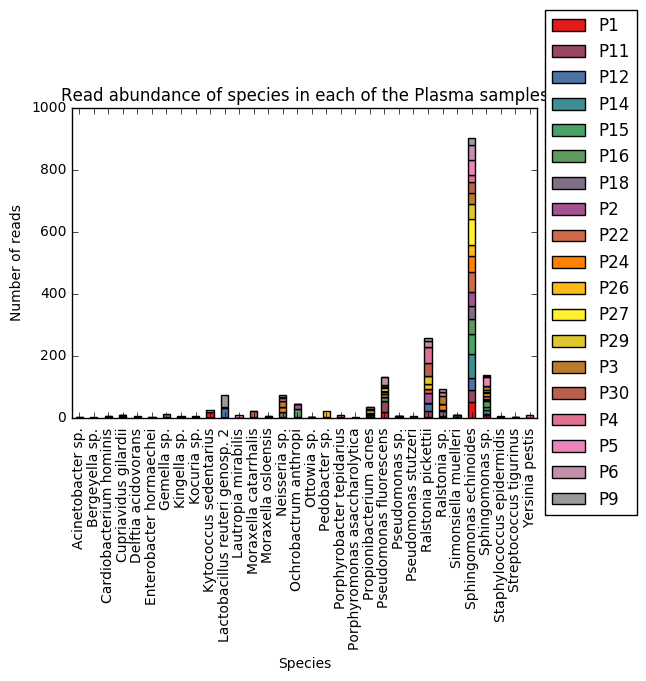

In [166]:
Plasma_plot_samples= Plasma_pivot.plot(kind='bar', stacked= True, colormap="Set1", title= "Read abundance of species in each of the Plasma samples")
Plasma_plot_samples.set_xlabel("Species")
Plasma_plot_samples.set_ylabel("Number of reads")
Plasma_plot_samples.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The graph above shows the read abundance of each of the species that were found in the plasma and the relative abundance in each of the patients.

I need to repeat all of the above steps for the samples from the buffy coat

## Buffy coat samples

Like the plasma samples the output of MED for the buffy coat samples also have a sample ID denoting the representative node and read abundances.

In [30]:
BCMED.head()

,samples,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,BC18,...,BC27,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9
0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,57,0.237921,0.205846,0.302812,0.045263,0.325054,0.078864,0.355735,0.250238,0.565428,...,0.411080,0.150477,0.385256,0.35963,0.158781,0.322407,0.126537,0.070061,0.413330,0.187348
2,353,0.000000,1.289968,1.499640,0.000000,1.966994,0.000000,0.000000,0.460437,0.000000,...,0.000000,0.827621,0.004756,0.00000,0.000000,0.934981,3.543022,0.000000,0.000000,0.000000
3,362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.615509,...,0.000000,0.994817,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,653,1.610542,6.010704,0.360490,0.000000,0.183364,2.661672,3.278531,0.000000,0.000000,...,2.985005,0.000000,0.000000,0.00000,0.007939,0.005373,0.018077,0.216021,1.633945,0.000000


One of the outputs of MED is a sequence file with the representative sequences for the nodes denoted by the query sequence ID.

In [31]:
Bchomd.head()

,Query seq,Query length (nt),Hit HOT,Hit HOMD seq name,HOMD clone name,Identities (%),Mismatch,Identities (no gaps & non-AGCTU)(%),Mismatch (no gaps & non-AGCTU),Score (bits),Query Start,Subject Start,Query End,Subject End
0,20,300,824,824_5951,Bacillus anthracis | HOT_824 | Strain_Delta Am...,100.0,0/300,100.0,0/300,542,1,321,300,620
1,57,198,3,003_0566,Sphingomonas echinoides | HOT_003 | Clone_nby4...,100.0,0/198,100.0,0/198,358,1,281,198,478
2,353,300,25,025AV011,Leptothrix sp. | HOT_025 | Clone_AV011a | GB_A...,94.7,16/301,95.3,14/299,464,1,307,300,606
3,362,300,571,571_7530,Burkholderia cepacia | HOT_571 | Strain_ATCC 2...,99.3,2/300,99.3,2/300,533,1,309,300,608
4,653,300,612,612_4476,Pseudomonas fluorescens | HOT_612 | Strain_ATC...,100.0,0/300,100.0,0/300,542,1,307,300,606


Need to replace the sample ID with clone name

In [32]:
merged_bc= pd.merge(left = BCMED, right= Bchomd, left_on= 'samples', right_on='Query seq')

In [34]:
merged_bc.head()

,samples,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,BC18,...,HOMD clone name,Identities (%),Mismatch,Identities (no gaps & non-AGCTU)(%),Mismatch (no gaps & non-AGCTU),Score (bits),Query Start,Subject Start,Query End,Subject End
0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,Bacillus anthracis | HOT_824 | Strain_Delta Am...,100.0,0/300,100.0,0/300,542,1,321,300,620
1,57,0.237921,0.205846,0.302812,0.045263,0.325054,0.078864,0.355735,0.250238,0.565428,...,Sphingomonas echinoides | HOT_003 | Clone_nby4...,100.0,0/198,100.0,0/198,358,1,281,198,478
2,353,0.000000,1.289968,1.499640,0.000000,1.966994,0.000000,0.000000,0.460437,0.000000,...,Leptothrix sp. | HOT_025 | Clone_AV011a | GB_A...,94.7,16/301,95.3,14/299,464,1,307,300,606
3,362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.615509,...,Burkholderia cepacia | HOT_571 | Strain_ATCC 2...,99.3,2/300,99.3,2/300,533,1,309,300,608
4,653,1.610542,6.010704,0.360490,0.000000,0.183364,2.661672,3.278531,0.000000,0.000000,...,Pseudomonas fluorescens | HOT_612 | Strain_ATC...,100.0,0/300,100.0,0/300,542,1,307,300,606


In [46]:
merged_bc.columns

Index(['samples', 'BC1', 'BC10', 'BC11', 'BC12', 'BC14', 'BC15', 'BC16',
       'BC17', 'BC18', 'BC19', 'BC20', 'BC21', 'BC23', 'BC24', 'BC25', 'BC26',
       'BC27', 'BC28', 'BC3', 'BC30', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8', 'BC9',
       'Query seq', 'Query length (nt)', 'Hit HOT', 'Hit HOMD seq name',
       'HOMD clone name', 'Identities (%)', 'Mismatch',
       'Identities (no gaps & non-AGCTU)(%)', 'Mismatch (no gaps & non-AGCTU)',
       'Score (bits)', 'Query Start', 'Subject Start', 'Query End',
       'Subject End'],
      dtype='object')

In [47]:
rearrange_bc= merged_bc.groupby(['HOMD clone name'], as_index=False).sum()

In [48]:
rearrange_bc.head()

,HOMD clone name,samples,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,...,Query seq,Query length (nt),Hit HOT,Identities (%),Identities (no gaps & non-AGCTU)(%),Score (bits),Query Start,Subject Start,Query End,Subject End
0,Bacillus anthracis | HOT_824 | Strain_Delta Am...,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,20,300,824,100.0,100.0,542,1,321,300,620
1,Bosea vestrisii | HOT_636 | Strain_G8569 | GB_...,4932,0.000000,0.644984,2.480173,1.086324,0.850142,0.0,7.566580,0.000000,...,4932,1223,3180,490.6,490.6,2090,5,1405,1220,2620
2,Brevundimonas diminuta | HOT_590 | Strain_IFO ...,7870,0.000000,0.000000,9.574621,0.271581,0.000000,0.0,1.547928,0.000000,...,7870,696,1770,297.3,297.3,1221,3,843,696,1536
3,Burkholderia cepacia | HOT_571 | Strain_ATCC 2...,362,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,362,300,571,99.3,99.3,533,1,309,300,608
4,Cupriavidus gilardii | HOT_027 | Strain_C37KA ...,17004,0.353831,0.000000,0.000000,2.618817,0.000000,0.0,0.000000,1.821731,...,17004,795,81,274.5,274.5,1101,3,915,774,1686


In [49]:
rearrange_bc.columns

Index(['HOMD clone name', 'samples', 'BC1', 'BC10', 'BC11', 'BC12', 'BC14',
       'BC15', 'BC16', 'BC17', 'BC18', 'BC19', 'BC20', 'BC21', 'BC23', 'BC24',
       'BC25', 'BC26', 'BC27', 'BC28', 'BC3', 'BC30', 'BC4', 'BC5', 'BC6',
       'BC7', 'BC8', 'BC9', 'Query seq', 'Query length (nt)', 'Hit HOT',
       'Identities (%)', 'Identities (no gaps & non-AGCTU)(%)', 'Score (bits)',
       'Query Start', 'Subject Start', 'Query End', 'Subject End'],
      dtype='object')

In [80]:
rearrange_bc=rearrange_bc[['HOMD clone name', 'BC1', 'BC10', 'BC11', 'BC12', 'BC14',
       'BC15', 'BC16', 'BC17', 'BC18', 'BC19', 'BC20', 'BC21', 'BC23', 'BC24',
       'BC25', 'BC26', 'BC27', 'BC28', 'BC3', 'BC30', 'BC4', 'BC5', 'BC6',
       'BC7', 'BC8', 'BC9']]

In [81]:
rearrange_bc.head()

,HOMD clone name,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,BC18,...,BC27,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9
0,Bacillus anthracis | HOT_824 | Strain_Delta Am...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bosea vestrisii | HOT_636 | Strain_G8569 | GB_...,0.000000,0.644984,2.480173,1.086324,0.850142,0.0,7.566580,0.000000,0.872375,...,0.000000,0.000000,0.000000,0.313719,0.000000,0.000000,0.000000,0.163475,0.058125,0.000000
2,Brevundimonas diminuta | HOT_590 | Strain_IFO ...,0.000000,0.000000,9.574621,0.271581,0.000000,0.0,1.547928,0.000000,0.000000,...,0.004671,2.716937,0.014269,0.000000,0.000000,0.005373,1.988431,0.000000,0.012917,0.000000
3,Burkholderia cepacia | HOT_571 | Strain_ATCC 2...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.615509,...,0.000000,0.994817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cupriavidus gilardii | HOT_027 | Strain_C37KA ...,0.353831,0.000000,0.000000,2.618817,0.000000,0.0,0.000000,1.821731,0.000000,...,0.018685,0.969738,0.000000,0.000000,2.246745,0.623321,0.000000,1.336992,0.000000,1.011678


Need to remove extra information and leave only the species name in column 1.

In [174]:
bc_names = []
label = ['species']
for i in rearrange_bc['HOMD clone name']:
    new = [i.split("|")[0]]
    new_tuple = tuple(new)
    bc_names.append((tuple(new)))

new_bcnames = rearrange_bc.from_records(bc_names,columns=label)
new_bcnames

,species
0,Bacillus anthracis
1,Bosea vestrisii
2,Brevundimonas diminuta
3,Burkholderia cepacia
4,Cupriavidus gilardii
5,Leptothrix sp.
6,Neisseria sp.
7,Neisseria weaveri
8,Propionibacterium acnes
9,Pseudomonas fluorescens


Need to replace the clone name with species name 

In [139]:
update_name_rearrangedbc= pd.concat([rearrange_bc, new_bcnames], axis=1)

In [140]:
update_name_rearrangedbc.head()

,HOMD clone name,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,BC18,...,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9,species
0,Bacillus anthracis | HOT_824 | Strain_Delta Am...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bacillus anthracis
1,Bosea vestrisii | HOT_636 | Strain_G8569 | GB_...,0.000000,0.644984,2.480173,1.086324,0.850142,0.0,7.566580,0.000000,0.872375,...,0.000000,0.000000,0.313719,0.000000,0.000000,0.000000,0.163475,0.058125,0.000000,Bosea vestrisii
2,Brevundimonas diminuta | HOT_590 | Strain_IFO ...,0.000000,0.000000,9.574621,0.271581,0.000000,0.0,1.547928,0.000000,0.000000,...,2.716937,0.014269,0.000000,0.000000,0.005373,1.988431,0.000000,0.012917,0.000000,Brevundimonas diminuta
3,Burkholderia cepacia | HOT_571 | Strain_ATCC 2...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.615509,...,0.994817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Burkholderia cepacia
4,Cupriavidus gilardii | HOT_027 | Strain_C37KA ...,0.353831,0.000000,0.000000,2.618817,0.000000,0.0,0.000000,1.821731,0.000000,...,0.969738,0.000000,0.000000,2.246745,0.623321,0.000000,1.336992,0.000000,1.011678,Cupriavidus gilardii


In [141]:
completed_bc = update_name_rearrangedbc[['species', 'BC1', 'BC10', 'BC11', 'BC12', 'BC14',
       'BC15', 'BC16', 'BC17', 'BC18', 'BC19', 'BC20', 'BC21', 'BC23', 'BC24',
       'BC25', 'BC26', 'BC27', 'BC28', 'BC3', 'BC30', 'BC4', 'BC5', 'BC6',
       'BC7', 'BC8', 'BC9']]

The table below is the completed buffy coat results

In [160]:
completed_bc

,species,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,BC18,...,BC27,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9
0,Bacillus anthracis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bosea vestrisii,0.000000,0.644984,2.480173,1.086324,0.850142,0.000000,7.566580,0.000000,0.872375,...,0.000000,0.000000,0.000000,0.313719,0.000000,0.000000,0.000000,0.163475,0.058125,0.000000
2,Brevundimonas diminuta,0.000000,0.000000,9.574621,0.271581,0.000000,0.000000,1.547928,0.000000,0.000000,...,0.004671,2.716937,0.014269,0.000000,0.000000,0.005373,1.988431,0.000000,0.012917,0.000000
3,Burkholderia cepacia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.615509,...,0.000000,0.994817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cupriavidus gilardii,0.353831,0.000000,0.000000,2.618817,0.000000,0.000000,0.000000,1.821731,0.000000,...,0.018685,0.969738,0.000000,0.000000,2.246745,0.623321,0.000000,1.336992,0.000000,1.011678
5,Leptothrix sp.,0.000000,1.289968,1.499640,0.000000,1.966994,0.000000,0.000000,0.460437,0.000000,...,0.000000,0.827621,0.004756,0.000000,0.000000,0.934981,3.543022,0.000000,0.000000,0.000000
6,Neisseria sp.,5.295266,0.000000,0.000000,37.575170,0.008335,0.000000,0.000000,24.568340,0.000000,...,0.107441,15.774954,0.090369,0.068865,32.827882,8.226760,0.000000,21.403550,0.012917,15.474927
7,Neisseria weaveri,0.000000,0.988061,0.778659,0.000000,1.408568,0.000000,0.000000,0.315300,0.000000,...,0.000000,0.593546,0.000000,0.000000,0.000000,0.773778,1.663051,0.000000,0.000000,0.000000
8,Propionibacterium acnes,0.006101,0.013723,0.028839,0.640155,0.000000,11.737645,0.000000,2.282168,0.032310,...,3.129817,8.485203,4.570749,10.130844,1.127342,1.209027,0.000000,3.287015,6.303281,0.000000
9,Pseudomonas fluorescens,2.702538,9.427748,0.519106,0.433236,0.258376,4.403260,5.134122,0.005005,0.000000,...,4.680712,0.000000,0.004756,0.000000,0.007939,0.005373,0.018077,0.338627,2.757685,0.000000


In [143]:
bc_pivot=pd.pivot_table(completed_bc, index=["species"])

In [144]:
bc_pivot.head()

,BC1,BC10,BC11,BC12,BC14,BC15,BC16,BC17,BC18,BC19,...,BC27,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9
species,,,,,,,,,,,,,,,,,,,,,
Bacillus anthracis,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bosea vestrisii,0.000000,0.644984,2.480173,1.086324,0.850142,0.0,7.566580,0.000000,0.872375,0.000000,...,0.000000,0.000000,0.000000,0.313719,0.000000,0.000000,0.000000,0.163475,0.058125,0.000000
Brevundimonas diminuta,0.000000,0.000000,9.574621,0.271581,0.000000,0.0,1.547928,0.000000,0.000000,0.000000,...,0.004671,2.716937,0.014269,0.000000,0.000000,0.005373,1.988431,0.000000,0.012917,0.000000
Burkholderia cepacia,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.615509,0.000000,...,0.000000,0.994817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cupriavidus gilardii,0.353831,0.000000,0.000000,2.618817,0.000000,0.0,0.000000,1.821731,0.000000,0.027241,...,0.018685,0.969738,0.000000,0.000000,2.246745,0.623321,0.000000,1.336992,0.000000,1.011678


Creating graph to show species found in buffy coat and their distribution amongst the samples

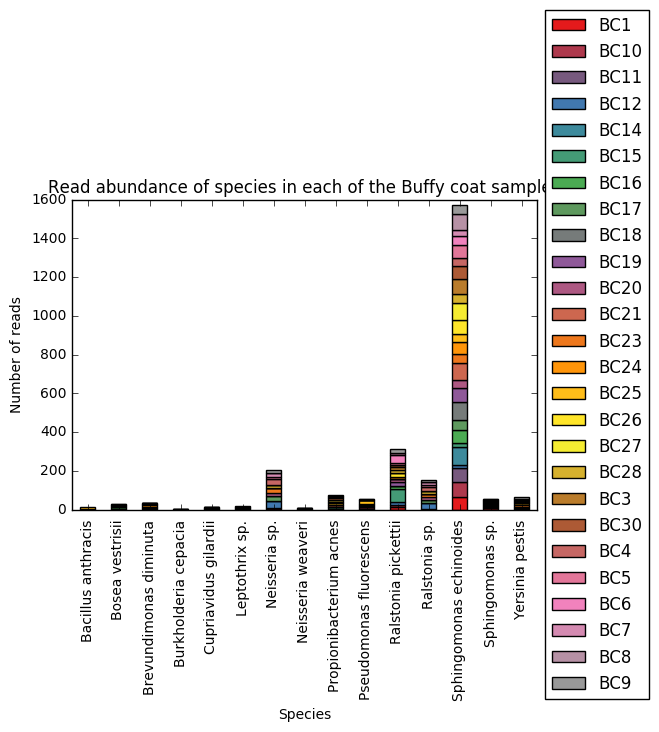

In [145]:
bc_plot= bc_pivot.plot(kind='bar', stacked= True, colormap="Set1", title= "Read abundance of species in each of the Buffy coat samples")
bc_plot.set_xlabel("Species")
bc_plot.set_ylabel("Number of reads")
bc_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

LefSe analysis requires all the data to be included in one table, so merging the tables

In [169]:
Lefse_prep= pd.merge(completed_plasma, completed_bc, on='species', how = 'outer')

In [170]:
Lefse_prep

,species,P1,P11,P12,P14,P15,P16,P18,P2,P22,...,BC27,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9
0,Acinetobacter sp.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007183,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bergeyella sp.,0.000000,0.000000,0.000000,0.000000,2.288482,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cardiobacterium hominis,0.000000,0.000000,0.000000,0.000000,3.390963,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cupriavidus gilardii,0.000000,0.009859,0.000000,0.006588,0.008352,0.221574,1.659244,0.107817,0.000000,...,0.018685,0.969738,0.000000,0.000000,2.246745,0.623321,0.000000,1.336992,0.000000,1.011678
4,Delftia acidovorans,0.012708,0.000000,0.000000,0.000000,0.000000,0.000000,1.077431,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Enterobacter hormaechei,0.000000,2.514049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Gemella sp.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.061629,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kingella sp.,4.092007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Kocuria sp.,2.567035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kytococcus sedentarius,18.363197,0.000000,0.000000,0.000000,0.000000,0.000000,0.007183,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
Lefsefile= Lefse_prep.fillna(0)

The table below is the table that would be uploaded into the LefSe webpage

In [173]:
Lefsefile.head()

,species,P1,P11,P12,P14,P15,P16,P18,P2,P22,...,BC27,BC28,BC3,BC30,BC4,BC5,BC6,BC7,BC8,BC9
0,Acinetobacter sp.,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.007183,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,Bergeyella sp.,0.000000,0.000000,0.0,0.000000,2.288482,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,Cardiobacterium hominis,0.000000,0.000000,0.0,0.000000,3.390963,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,Cupriavidus gilardii,0.000000,0.009859,0.0,0.006588,0.008352,0.221574,1.659244,0.107817,0.0,...,0.018685,0.969738,0.0,0.0,2.246745,0.623321,0.0,1.336992,0.0,1.011678
4,Delftia acidovorans,0.012708,0.000000,0.0,0.000000,0.000000,0.000000,1.077431,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000


File called plasmabc.csv can be uploaded in order to carry out LefSe analysis

In [176]:
Lefsefile.to_csv("plasmabc.csv")